# Homework 5 - Explore California and Nevada with graphs

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import gzip

## 1. Data collection

In [3]:
coord = pd.read_csv('USA-road-d.CAL.co', sep = ',', delimiter = " ",
                      index_col = None, usecols = None, encoding = 'ISO-8859-1')  # we read the input file

C:\Users\Giulio\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
coord.drop(columns=['c','Challenge:','Shortest','Paths'], inplace = True) # drop all the information useless

In [6]:
coord.rename(columns={"c": "char","9th":"ID","DIMACS":"Longitude","Implementation":"Latitude"},inplace = True) 
#rename the columns

In [7]:
coord.drop(coord.index[:6], inplace=True) #the first 6 columns are not information about the node

In [8]:
coord

,ID,Longitude,Latitude
6,1,-114315309,34133550
7,2,-114223946,34176221
8,3,-114307299,34148791
9,4,-114318765,34138889
10,5,-114347300,34042614
...,...,...,...
1890816,1890811,-114010850,37121318
1890817,1890812,-114027219,37120524
1890818,1890813,-114022545,37121222
1890819,1890814,-114038688,37087748


In [56]:
G = nx.Graph() # create the graph

In [57]:
# create all the node, with two attributes, latitude and longitute
for long in coord.iterrows():
    l = list(long[1])
    idx = int(l[0])
    lat = int(l[1])
    long = -int(l[2])
    G.add_node(idx, latitude = lat, longitude = long)

In [31]:
# now inport the time_distance file and create a dataframe
time = pd.read_csv("USA-road-t.CAL.gr",sep = ',',skiprows = 7, delimiter=" ",names = ['char','N_1','N_2','time'])

In [32]:
time.drop(columns=['char'],inplace = True)

In [33]:
# now inport the physical_distance  file and create a dataframe

dist = pd.read_csv("USA-road-d.CAL.gr",sep = ',',skiprows = 7, delimiter=" ",names = ['char','N_1','N_2','dist'])

In [34]:
dist.drop(columns=['char'],inplace = True)

In [35]:
final = dist.merge(time, on = ["N_1","N_2"])

2356409.0

In [58]:
for idx in final.iterrows():
    l = list(idx[1])
    source = int(l[0])
    dest = int(l[1])
    di = int(l[2])
    ti = int(l[3])
    
    G.add_edge(source,dest,time = ti, dist = di)

In [70]:
type(G[1][1803]['time'])

int

In [62]:
G.n    print(i)

1048577
1803


##  Functionality 1 - Find the Neighbours! 

In [112]:
def func_1(v,d):
    l = set()
    G_aux = nx.Graph()
    G_aux.add_node(v,latitude = G.node[v]['latitude'],longitude = G.node[v]['longitude'])
    for i in G.neighbors(v):
        if(G[v][i]['time'] <= d):
            G_aux.add_node(i,latitude = G.node[i]['latitude'],longitude = G.node[i]['longitude'])
            G_aux.add_edge(v,i, weight = G[v][i]['time'])
    return G_aux
        

In [128]:
l = func_1(36,352543245)
l.number_of_nodes()

4

In [114]:
for node in l.nodes():
    print(l.nodes[node]['latitude'])

-114315309
-114315049
-114315667


In [129]:
pos = {}
for node in l.nodes():
    l.nodes[node]['pos'] = (l.nodes[node]['latitude'],l.node[node]['longitude'])

C:\Users\Giulio\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


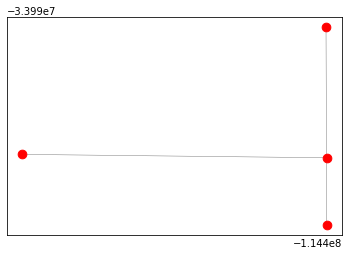

In [132]:
plt.clf()
nx.draw_networkx_nodes(l,nx.get_node_attributes(l,'pos'),
                      node_shape=".", node_color = 'red')
nx.draw_networkx_edges(l,pos = nx.get_node_attributes(l,'pos'), width=0.5,alpha= 0.5)
plt.show()

In [ ]:
def func_2(v):
    path = []
    